In [2]:
import pandas, numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
# Данные из postegreSQL
orders = pd.read_csv('../data/orders.csv')
delivery_windows = pd.read_csv('../data/delivery_windows.csv')
stores = pd.read_csv('../data/stores.csv')
addresses = pd.read_csv('../data/addresses.csv')
replacements = pd.read_csv('../data/replacements.csv')
cancellations = pd.read_csv('../data/cancellations.csv')

## Посмотрим orders на наличие чего-нибудь интересного

In [101]:
orders

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,3158715,61138,290.0,290.0,2543,0.0,89906,35,shipped,2018-01-05 10:50:00,2018-01-05 00:07:04,448086,2,75258.0
1,3182881,73307,190.0,190.0,6076,0.0,30275,52,shipped,2018-01-06 15:33:54,2018-01-05 02:04:42,450946,10,75860.0
2,3146329,75386,290.0,290.0,2617,0.0,93040,24,shipped,2018-01-11 06:40:38,2018-01-05 02:07:35,458911,14,78635.0
3,3150465,45970,290.0,290.0,3422,0.0,10518,23,shipped,2018-01-06 12:55:22,2018-01-05 02:15:15,448101,21,75403.0
4,3169087,49089,90.0,90.0,3666,0.0,22740,31,shipped,2018-01-06 16:17:27,2018-01-05 02:48:52,451302,3,75825.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334240,5512572,682248,98.0,249.0,4066,0.0,20405,26,shipped,2019-08-04 20:51:49,2019-08-04 16:51:25,2669084,11,637148.0
334241,5512004,527223,1.0,1.0,20286,0.0,30260,41,shipped,2019-08-04 20:44:14,2019-08-04 17:19:21,2668522,12,637201.0
334242,5512605,681372,98.0,249.0,1343,-399.0,6898,14,shipped,2019-08-04 20:30:52,2019-08-04 17:28:31,2669120,3,637047.0
334243,5316955,165630,449.0,449.0,2468,0.0,55524,49,shipped,2019-08-04 20:48:24,2019-08-04 17:36:08,2467589,3,637047.0


In [102]:
orders.describe()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,ship_address_id,store_id,delivery_window_id
count,3.342450e+05,334245.000000,334245.000000,334245.000000,334245.000000,334245.000000,3.342450e+05,334245.000000,3.342450e+05,334245.000000,334244.000000
mean,4.188269e+06,177843.373415,189.069228,257.827092,4917.515152,-66.523240,2.692579e+04,44.192721,1.388983e+06,23.189529,370981.101713
std,6.588292e+05,130990.121425,175.353450,172.493721,5526.465519,304.918133,4.187307e+04,75.054887,6.108061e+05,29.692184,165423.948184
min,5.570000e+02,31.000000,-298.000000,0.000000,0.000000,-39899.300000,0.000000e+00,0.000000,6.017000e+03,1.000000,75244.000000
25%,3.634639e+06,84872.000000,0.000000,199.000000,2566.000000,0.000000,9.685000e+03,18.000000,8.531730e+05,8.000000,231656.000000
50%,4.134595e+06,146590.000000,199.000000,299.000000,3873.000000,0.000000,1.818000e+04,31.000000,1.333773e+06,11.000000,372995.000000
75%,4.745424e+06,243751.000000,299.000000,299.000000,5806.000000,0.000000,3.193500e+04,50.000000,1.890743e+06,21.000000,517636.000000
max,5.513202e+06,682383.000000,9500.000000,9500.000000,480746.000000,0.000000,3.864000e+06,7728.000000,2.669705e+06,120.000000,638550.000000


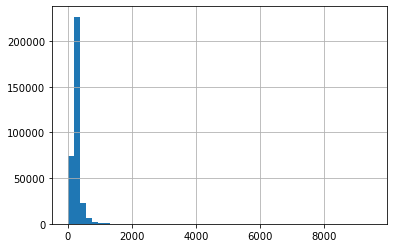

In [61]:
orders['cost'].hist(bins=50)

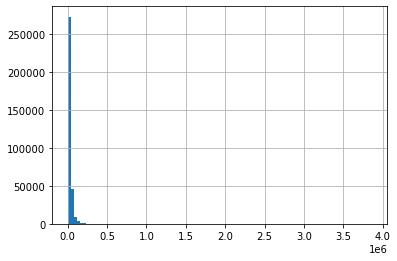

In [73]:
orders['total_weight'].hist(bins=100)

In [131]:
df_1 = pd.DataFrame(columns=['total_weight', 'cost'])
df_1['total_weight'] = orders['total_weight']
df_1['cost'] = orders['cost']
df_1.corr()

,total_weight,cost
total_weight,1.000000,0.430847
cost,0.430847,1.000000


In [132]:
df_2 = pd.DataFrame(columns=['user_id', 'ship_address_id'])
df_2['user_id'] = orders['user_id']
df_2['ship_address_id'] = orders['ship_address_id']
df_2.corr()

# Видно, что люди, которые заказывают часто, заказывают в разные места.
# От тех, кто заказывает много зависит показатель корреляции -> не всегда заказывают в одно место

,user_id,ship_address_id
user_id,1.000000,0.688515
ship_address_id,0.688515,1.000000


Исходя из данных о ценах и весе покупки, люди покупают обычно на сумму меньше 1000 рублей, квантиль равен 300 рублей.
В большинстве случаев люди покупают что-то не очень тяжёлое.

Цена в большинстве случаев не зависит от веса покупок пользователей

In [71]:
print("Состояние доставки:", orders['state'].unique())
print("Виды магазинов:", orders['store_id'].unique())

Состояние доставки: ['shipped' 'pending' 'canceled']
Виды магазинов: [  2  10  14  21   3  12  11   1  57   6   8   9  56  58  62  63  68  70
  18  84  85  93  92  99  98 100  95 105 108 118 112 113 120]


 Здесь представлены не все виды магазинов, следаовательно у остальных либо проблемы с покупками, либо их просто нет
 Нужно пересмотреть есть ли они вообще. Если они есть, то возможно есть какие то проблемы с товарами

In [98]:
print(orders['state'].value_counts())

shipped     334225
canceled        13
pending          7
Name: state, dtype: int64


Исходя из данных по доставке можно сказать, что почти все заказы доставлены

Исходя из этих данных можно понять, что люди в основном заказывают продукты в небольших количествах, за небольшую цену
Поэтому мы можем получать прибыль с доставок, так как ресурсы домохозяйств не исчерпываются из-за цены в 300 рублей по квантилю

Можно попробовать провести операцию по поднятию цены покупок. Воздействую на покупателей каким-нибудь образом, например предлагая ему купить что-то ещё, как в макдональдсе. Возможно так возрастёт cost, но возможен отток покупателей, за этим надо следить

In [108]:
print(orders['user_id'].value_counts().describe())

count    119031.000000
mean          2.808050
std           6.459847
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         475.000000
Name: user_id, dtype: float64


В основном один человек заказывает не так много 1-2 раза, но есть аномальные значения, когда один человек покупает 475 раз.

Возможно людям не нравится сервис, если они так мало покупают. Ведь на рынке есть аналоги, скорее всего люди пользуются ими

Если один человек в основном покупает не так часто, то стоит попробовать провести принять меры по поднятию средней цены покупки, с помощью какого-нибудь воздействия на покупателя.

## Посмотрим delivery_windows на наличие чего-нибудь интересного

In [113]:
delivery_windows

,store_id,id,starts_at,ends_at,time_zone
0,2,75258,2018-01-05 08:00:00,2018-01-05 10:00:00,Europe/Moscow
1,10,75860,2018-01-06 15:00:00,2018-01-06 17:00:00,Europe/Moscow
2,14,78635,2018-01-11 06:00:00,2018-01-11 08:00:00,Europe/Moscow
3,21,75403,2018-01-05 09:00:00,2018-01-05 11:00:00,Europe/Moscow
4,3,75825,2018-01-06 16:00:00,2018-01-06 18:00:00,Europe/Moscow
...,...,...,...,...,...
386152,12,637201,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow
386153,3,637047,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow
386154,3,637047,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow
386155,12,637201,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow


In [152]:
def converter(date_start: str, date_end: str) -> float:
    """
        Функция возвращает количество минут на доставку
    """
    
    NUMBER = 3
    
    # with start
    splt_start = date_start.split()
    
    splt_start_YMD_str = splt_start[0].split('-')
    splt_start_YMD_int = []
    
    for index in splt_start_YMD_str:
        splt_start_YMD_int.append(int(index))
    
    splt_start_time_str = splt_start[1].split(':')
    splt_start_time_int = []
    
    for index in splt_start_time_str:
        splt_start_time_int.append(int(index))
    
    
    # with end
    splt_end = date_end.split()
    splt_end_YMD_str = splt_end[0].split('-')
    splt_end_YMD_int = []
    
    for index in splt_end_YMD_str:
        splt_end_YMD_int.append(int(index))
    
    splt_end_time_str = splt_end[1].split(':')
    splt_end_time_int = []
    
    for index in splt_end_time_str:
        splt_end_time_int.append(int(index))
    
    
#   date
    diff_date = [0] * NUMBER
    for index in range(NUMBER):
        diff_date[index] = splt_end_YMD_int[index] - splt_start_YMD_int[index]
    
    
#   time
    diff_time = [0] * NUMBER
    for index in range(NUMBER):
        diff_time[index] = splt_end_time_int[index] - splt_start_time_int[index]

# diff date скорее всего нам не понадобится, но мало-ли


#   Будем конвертировать в минуты
    
    minutes = 0
    
    counter = 0
    for index in diff_time:
        if counter == 0:
            minutes += index * 60
        elif counter == 1:
            minutes += index
        elif counter == 2:
            minutes += index / 60
        else:
            print("ошибка")
            break
            
        counter += 1
    return minutes


In [129]:
# a = delivery_windows['starts_at'][0].split()[1].split(':')
# splt_start_YMD_int = []
# for index in a:
#     splt_start_YMD_int.append(int(index))

# splt_start_YMD_int

# for index in splt_start_YMD_int:
    

[8, 0, 0]

#### Будем отслеживать время по минутам

In [155]:
a = converter(delivery_windows['starts_at'][0], delivery_windows['ends_at'][0])

delivery_time = []
for index in range(len(delivery_windows)):
    delivery_time.append(converter(delivery_windows['starts_at'][index], delivery_windows['ends_at'][index]))
delivery_windows.insert(5, 'delivery_time', delivery_time, True)
delivery_windows

,store_id,id,starts_at,ends_at,time_zone,delivery_time
0,2,75258,2018-01-05 08:00:00,2018-01-05 10:00:00,Europe/Moscow,120.0
1,10,75860,2018-01-06 15:00:00,2018-01-06 17:00:00,Europe/Moscow,120.0
2,14,78635,2018-01-11 06:00:00,2018-01-11 08:00:00,Europe/Moscow,120.0
3,21,75403,2018-01-05 09:00:00,2018-01-05 11:00:00,Europe/Moscow,120.0
4,3,75825,2018-01-06 16:00:00,2018-01-06 18:00:00,Europe/Moscow,120.0
...,...,...,...,...,...,...
386152,12,637201,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow,120.0
386153,3,637047,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow,120.0
386154,3,637047,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow,120.0
386155,12,637201,2019-08-04 20:00:00,2019-08-04 22:00:00,Europe/Moscow,120.0


120.0    359283
60.0      10676
240.0      6945
480.0      4124
180.0      2623
420.0      1144
300.0       599
360.0       518
30.0        141
540.0        94
660.0         9
600.0         1
Name: delivery_time, dtype: int64


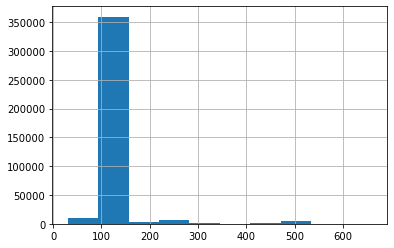

In [163]:
print(delivery_windows['delivery_time'].value_counts())
delivery_windows['delivery_time'].hist()

In [164]:
delivery_windows['time_zone'].value_counts()

Europe/Moscow         365113
Europe/Samara          10130
Asia/Yekaterinburg      6385
Asia/Omsk               4460
Europe/Kaliningrad        69
Name: time_zone, dtype: int64

Исходя из этих данных видно, что в основном еду доставляют за 2 часа, это плохой показатель относительно других доставочный компаний. Тот же delivery club или Яндекс еда доставляют продукты за минут 30-50.

Поэтому основные правки надо делать сделать в сфере доставки(Скорее всего из-за этого по квантилю еду заказывают 1 раз

Я не рассмотрел регионы, потому что слишком большое количество заказов, которые доставляются 2 часа -> проблема доставки скорее всего везде по принципу Дирихле

## Рассмотрим Stores на предмет зависимостей

In [169]:
stores

,id,city,retailer_id
0,1,1,1
1,2,1,1
2,3,1,1
3,8,1,1
4,9,1,1
5,10,1,1
6,11,1,1
7,12,1,1
8,14,1,1
9,18,1,1


In [201]:
stores['city'].value_counts()

1     17
7      6
2      5
10     4
8      3
13     2
5      2
23     1
20     1
Name: city, dtype: int64

In [214]:
addresses

,lat,lon,id,elevator,floor
0,55.872131,37.640294,6017,passenger,4
1,55.834058,37.323884,7047,NaN,-
2,55.802137,37.846993,8531,passenger,21
3,55.793141,37.526937,10417,passenger,2
4,55.818450,37.519013,10472,NaN,-
...,...,...,...,...,...
834878,53.235532,50.253009,3589747,NaN,-
834879,55.824985,37.817140,3589755,NaN,-
834880,55.563151,37.855464,3589759,NaN,-
834881,55.754626,37.620863,3589783,NaN,-


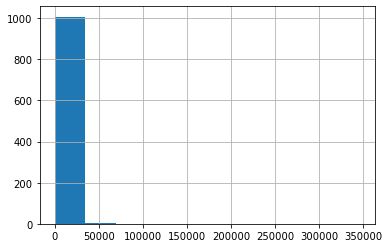

In [223]:
addresses['floor'].value_counts().hist(bins=10)

Иногда люди ставят большие этажи, поэтому нужна валидация ввода данных

## Посмотрим Reaplacements

In [230]:
replacements

,order_id,item_id,state
0,3190332,5332717,replaced
1,3190332,5332761,replaced
2,3097213,5332862,replaced
3,3097213,5332917,replaced
4,3188867,5440591,replaced
...,...,...,...
328313,5512605,28170256,replaced
328314,5512605,28170766,replaced
328315,5513202,28149927,replaced
328316,5513202,28149946,replaced


In [249]:
print(replacements['state'].value_counts())
# У нас нет в state никаких других видов, поэтому можно не рассматривать state
replacements_new = replacements.drop(['state'], axis=1)
replacements_new.corr()
# Здесь наблюдается связь меду случайными величинами

replaced    328318
Name: state, dtype: int64


,order_id,item_id
order_id,1.000000,0.937536
item_id,0.937536,1.000000


Здесь нет никаких зависимостей

## Посмотрим Сancellations на наличие зависиостей

In [245]:
cancellations

,order_id,item_id,state
0,3182881,5331852,canceled
1,3182881,5351271,canceled
2,3182881,5351087,canceled
3,3182881,5351090,canceled
4,3146329,5356620,canceled
...,...,...,...
507203,5271730,28144890,canceled
507204,5271730,28138493,canceled
507205,5512004,28164137,canceled
507206,5512004,28164246,canceled


In [251]:
print(cancellations['state'].value_counts())
# У нас нет в state никаких других видов, поэтому можно не рассматривать state
cancellations_1 = cancellations.drop(['state'], axis=1)
cancellations_1.corr()
# Здесь наблюдается связь меду случайными величинами

canceled    507208
Name: state, dtype: int64


,order_id,item_id
order_id,1.000000,0.939081
item_id,0.939081,1.000000
